# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
data = pd.read_csv("train.csv")

In [59]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
data.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)

In [61]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [62]:
data_with_dummies = pd.get_dummies(data)

In [63]:
data_with_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,False
2,1,3,26.0,0,0,7.9250,True,False
3,1,1,35.0,1,0,53.1000,True,False
4,0,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True
887,1,1,19.0,0,0,30.0000,True,False
888,0,3,NaN,1,2,23.4500,True,False
889,1,1,26.0,0,0,30.0000,False,True


In [64]:
data = data_with_dummies

In [65]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,False
2,1,3,26.0,0,0,7.9250,True,False
3,1,1,35.0,1,0,53.1000,True,False
4,0,3,35.0,0,0,8.0500,False,True


In [66]:
def true_false_mapper(x):
    return_value = 1 if x else 0
    return return_value

In [67]:
data["Sex_female"] = data["Sex_female"].map(true_false_mapper)

In [68]:
data["Sex_male"] = data["Sex_male"].map(true_false_mapper)

In [69]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [70]:
data = data[["Survived", "Age", "Fare", "Pclass", "Sex_female", "Sex_male", "SibSp", "Parch"]]

In [71]:
data.head()

,Survived,Age,Fare,Pclass,Sex_female,Sex_male,SibSp,Parch
0,0,22.0,7.2500,3,0,1,1,0
1,1,38.0,71.2833,1,1,0,1,0
2,1,26.0,7.9250,3,1,0,0,0
3,1,35.0,53.1000,1,1,0,1,0
4,0,35.0,8.0500,3,0,1,0,0


In [72]:
data.isnull().sum()

Survived        0
Age           177
Fare            0
Pclass          0
Sex_female      0
Sex_male        0
SibSp           0
Parch           0
dtype: int64

In [73]:
data["Age"].fillna(value=data["Age"].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_17708\694239901.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(value=data["Age"].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_17708\694239901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"].fillna(value=data["Age"].mean(), inplace=True)


In [74]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass        0
Sex_female    0
Sex_male      0
SibSp         0
Parch         0
dtype: int64

In [75]:
data.head()

,Survived,Age,Fare,Pclass,Sex_female,Sex_male,SibSp,Parch
0,0,22.0,7.2500,3,0,1,1,0
1,1,38.0,71.2833,1,1,0,1,0
2,1,26.0,7.9250,3,1,0,0,0
3,1,35.0,53.1000,1,1,0,1,0
4,0,35.0,8.0500,3,0,1,0,0


In [76]:
data_with_dummies = pd.get_dummies(data, columns=["Pclass", "SibSp", "Parch"])

In [77]:
data_with_dummies

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.000000,7.2500,0,1,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
1,1,38.000000,71.2833,1,0,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,1,26.000000,7.9250,1,0,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
3,1,35.000000,53.1000,1,0,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0,35.000000,8.0500,0,1,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
887,1,19.000000,30.0000,1,0,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
888,0,29.699118,23.4500,1,0,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
889,1,26.000000,30.0000,0,1,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [78]:
data_with_dummies.shape

(891, 22)

In [80]:
data = data_with_dummies

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Sex_female  891 non-null    int64  
 4   Sex_male    891 non-null    int64  
 5   Pclass_1    891 non-null    bool   
 6   Pclass_2    891 non-null    bool   
 7   Pclass_3    891 non-null    bool   
 8   SibSp_0     891 non-null    bool   
 9   SibSp_1     891 non-null    bool   
 10  SibSp_2     891 non-null    bool   
 11  SibSp_3     891 non-null    bool   
 12  SibSp_4     891 non-null    bool   
 13  SibSp_5     891 non-null    bool   
 14  SibSp_8     891 non-null    bool   
 15  Parch_0     891 non-null    bool   
 16  Parch_1     891 non-null    bool   
 17  Parch_2     891 non-null    bool   
 18  Parch_3     891 non-null    bool   
 19  Parch_4     891 non-null    b

In [83]:
data.iloc[:, 5:] = data.iloc[:, 5:].map(true_false_mapper)

C:\Users\hp\AppData\Local\Temp\ipykernel_17708\2450104526.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Pclass_1, Length: 891, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.iloc[:, 5:] = data.iloc[:, 5:].map(true_false_mapper)
C:\Users\hp\AppData\Local\Temp\ipykernel_17708\2450104526.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    0
Name: Pclass_2, Length: 891, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.iloc[:, 5:] = data.iloc[:, 5:].map(true_false_mapper)
C:\Users\hp\AppData\Local\Temp\ipykernel_17708\2450104526.

# Decision Tree

In [85]:
data.head()

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.0,7.2500,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,35.0,8.0500,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
y = data["Survived"]
X = data.drop(["Survived"], axis=1)

In [87]:
from sklearn.model_selection import train_test_split

In [92]:
# Training & Validation Set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=101, stratify=y, test_size=0.25)

In [93]:
y_train.value_counts(normalize=True)

Survived
0    0.616766
1    0.383234
Name: proportion, dtype: float64

In [94]:
y_valid.value_counts(normalize=True)

Survived
0    0.61435
1    0.38565
Name: proportion, dtype: float64

In [95]:
X_valid.shape, y_valid.shape

((223, 21), (223,))

In [96]:
X_train.shape, y_train.shape

((668, 21), (668,))

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
dt_model = DecisionTreeClassifier(random_state=10)

In [100]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [103]:
dt_model.score(X_train, y_train)

0.9880239520958084

In [104]:
dt_model.score(X_valid, y_valid)

0.7488789237668162

In [105]:
dt_model.predict(X_valid)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [106]:
dt_model.predict_proba(X_valid)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [107]:
y_pred = dt_model.predict_proba(X_valid)[:, 1]

In [109]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_valid, new_y)

0.7488789237668162

# Changing the max depth

In [112]:
train_accuracy = []
validation_accuracy = []
for depth in range(1, 10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [113]:
frame = pd.DataFrame({"max_depth": range(1, 10), "train_acc": train_accuracy, "valid_acc": validation_accuracy})

In [115]:
frame

,max_depth,train_acc,valid_acc
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300
5,6,0.863772,0.775785
6,7,0.889222,0.771300
7,8,0.913174,0.784753
8,9,0.928144,0.784753


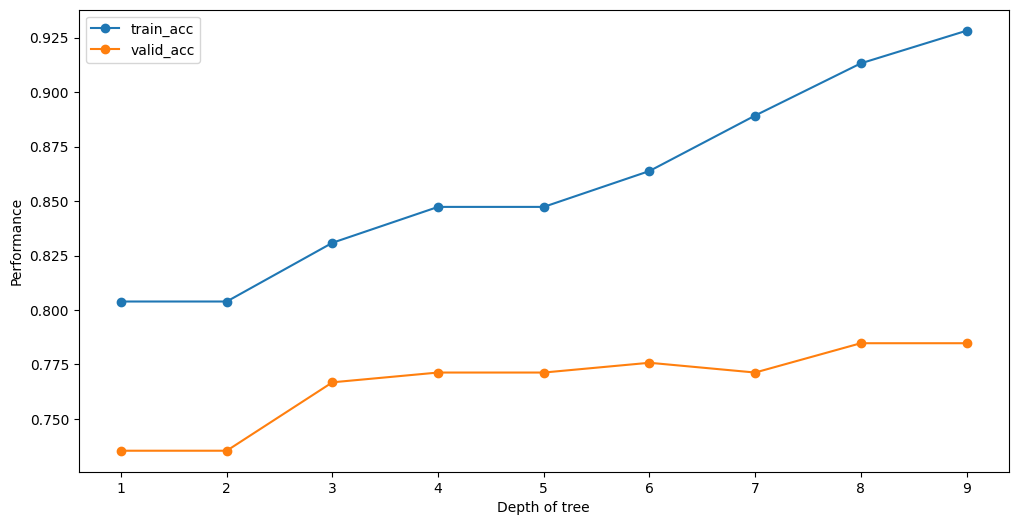

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o', label='train_acc')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o', label="valid_acc")
plt.xlabel("Depth of tree")
plt.ylabel("Performance")
plt.legend()

In [118]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [119]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [120]:
dt_model.score(X_train, y_train)

0.8802395209580839

In [121]:
dt_model.score(X_valid, y_valid)

0.8116591928251121

In [122]:
from sklearn import tree

In [129]:
decision_tree = tree.export_graphviz(dt_model, out_file=None, feature_names=X_train.columns, max_depth=2, filled=True)

[Text(0.4868421052631579, 0.9, 'Sex_female <= 0.5\ngini = 0.473\nsamples = 668\nvalue = [412, 256]'),
 Text(0.23684210526315788, 0.7, 'Fare <= 15.173\ngini = 0.277\nsamples = 421\nvalue = [351, 70]'),
 Text(0.3618421052631579, 0.8, 'True  '),
 Text(0.10526315789473684, 0.5, 'Age <= 10.5\ngini = 0.174\nsamples = 250\nvalue = [226, 24]'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.15789473684210525, 0.3, 'gini = 0.156\nsamples = 247\nvalue = [226, 21]'),
 Text(0.3684210526315789, 0.5, 'Pclass_1 <= 0.5\ngini = 0.393\nsamples = 171\nvalue = [125, 46]'),
 Text(0.2631578947368421, 0.3, 'Fare <= 15.373\ngini = 0.306\nsamples = 85\nvalue = [69, 16]'),
 Text(0.21052631578947367, 0.1, '\n  (...)  \n'),
 Text(0.3157894736842105, 0.1, '\n  (...)  \n'),
 Text(0.47368421052631576, 0.3, 'Age <= 14.5\ngini = 0.454\nsamples = 86\nvalue = [56.0, 30.0]'),
 Text(0.42105263157894735, 0.1, '\n  (...)  \n'),
 Text(0.5263157894736842, 0.1, '\n  (...)  \n'),
 Text(0.736

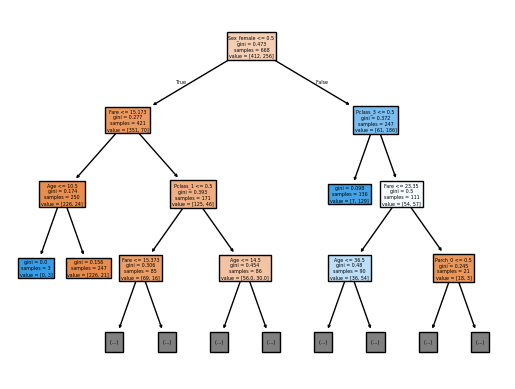

In [137]:
tree.plot_tree(dt_model, max_depth=3, feature_names=X_train.columns, filled=True)